In [1]:
!pip install scipy==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
from matplotlib.pyplot import title
num_graphs = 4 # Total groups we have (G_ii)
betw_graphs = num_graphs*(num_graphs-1)/2 # Graphs needed to represent interlayer relations (G_ij, i!=j)

# Generating intralayer relations graphs
G_11 = nx.erdos_renyi_graph(5, 0.8)
G_22 = nx.erdos_renyi_graph(5, 0.8)

# Generating interlayer relations graphs
G_12 = nx.erdos_renyi_graph(5, 0.1)
G_21 = nx.erdos_renyi_graph(5, 0.1)

In [60]:
# Adding random weights to our grpahs
import random

for (u, v) in G_11.edges():
    G_11.edges[u,v]['weight'] = random.randint(0,10)/10

for (u, v) in G_22.edges():
    G_22.edges[u,v]['weight'] = random.randint(0,10)/10

In [71]:
def plot_graph(G):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

    pos = nx.spring_layout(G_22, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G_22, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title('For '+str(G))
    plt.show()

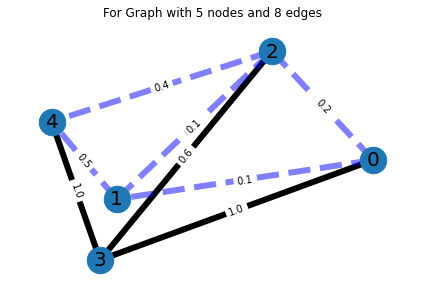

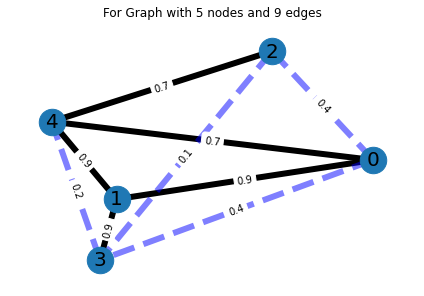

In [73]:
plot_graph(G_11)
plot_graph(G_22)